In [1]:
#Importing Libraries

import ast

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data cleanup

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\HP\anaconda3\envs\project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_skillset = df.copy()
df_exploded = df_skillset.explode("job_skills")
df_exploded = df_exploded.groupby(["job_title_short", "job_skills"]).size()
df_skillcount = df_exploded.reset_index(name="skill_counts")
df_skillcount.sort_values("skill_counts", ascending=False, inplace = True)

df_skillcount


,job_title_short,job_skills,skill_counts
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [6]:
job_titles = df_skillcount["job_title_short"].unique().tolist()

job_titles = job_titles[:3]

job_titles


['Data Scientist', 'Data Engineer', 'Data Analyst']

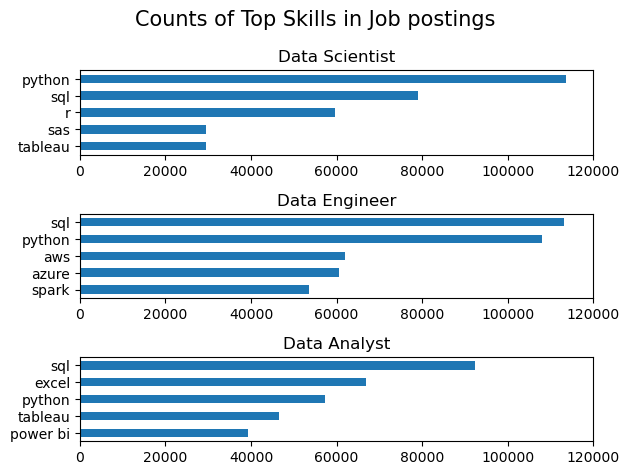

In [17]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skillcount[df_skillcount["job_title_short"] == job_title].head(5)
    df_plot = df_plot.plot(kind="barh", x = "job_skills", y = "skill_counts", ax = ax[i], title = job_title)

    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job postings', fontsize = 15)
fig.tight_layout()
plt.show()



